<a href="https://colab.research.google.com/github/Saisathvik-Achanta/Jyesta-Data-Science-Internship/blob/main/Feature_Engineering%2C_Scaling%2C_and_Selection_Demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Demonstrate feature engineering, feature scaling, and feature selection techniques (Filtering Methods, Wrapper Methods, and Embedded Techniques) using a randomly generated dataset, including suitable visualizations.

## Generate dataset

### Subtask:
Create a synthetic dataset with numerical and categorical features.


**Reasoning**:
The first step is to import the necessary libraries and generate a synthetic dataset with numerical and categorical features as described in the instructions.



In [1]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Generate 1000 rows
n_rows = 1000

# Create numerical features with different distributions
numerical_feature_1 = np.random.randn(n_rows) # Normal distribution
numerical_feature_2 = np.random.rand(n_rows) * 100 # Uniform distribution
numerical_feature_3 = np.random.poisson(5, n_rows) # Poisson distribution

# Create categorical features
categorical_feature_1 = np.random.choice(['A', 'B', 'C', 'D'], size=n_rows, p=[0.4, 0.3, 0.2, 0.1])
categorical_feature_2 = np.random.choice(['Red', 'Blue', 'Green'], size=n_rows)

# Create a target variable with some relationship to features
# Let's create a numerical target based on numerical_feature_1 and categorical_feature_2
# Add some noise as well
target_numerical = numerical_feature_1 * 10 + (categorical_feature_2 == 'Red') * 5 + np.random.randn(n_rows) * 2

# Create a categorical target based on numerical_feature_2 and categorical_feature_1
# Let's make it a binary target
target_categorical = (numerical_feature_2 > 50) | (categorical_feature_1 == 'A')

# Create the DataFrame
df = pd.DataFrame({
    'numerical_feature_1': numerical_feature_1,
    'numerical_feature_2': numerical_feature_2,
    'numerical_feature_3': numerical_feature_3,
    'categorical_feature_1': categorical_feature_1,
    'categorical_feature_2': categorical_feature_2,
    'target_numerical': target_numerical,
    'target_categorical': target_categorical
})

# Display the first few rows and info
display(df.head())
df.info()

,numerical_feature_1,numerical_feature_2,numerical_feature_3,categorical_feature_1,categorical_feature_2,target_numerical,target_categorical
0,0.496714,16.748258,2,B,Green,4.559576,False
1,-0.138264,10.456784,7,A,Green,-0.262740,True
2,0.647689,63.643025,5,A,Green,8.747898,True
3,1.523030,70.647573,5,B,Blue,18.943762,True
4,-0.234153,3.158614,8,B,Green,-2.524955,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   numerical_feature_1    1000 non-null   float64
 1   numerical_feature_2    1000 non-null   float64
 2   numerical_feature_3    1000 non-null   int64  
 3   categorical_feature_1  1000 non-null   object 
 4   categorical_feature_2  1000 non-null   object 
 5   target_numerical       1000 non-null   float64
 6   target_categorical     1000 non-null   bool   
dtypes: bool(1), float64(3), int64(1), object(2)
memory usage: 48.0+ KB


## Feature engineering

### Subtask:
Create new features from existing ones.


**Reasoning**:
Create new features based on the existing numerical and categorical features as instructed.



In [2]:
# 1. Create an interaction feature
df['interaction_feature'] = df['numerical_feature_1'] * df['numerical_feature_2']

# 2. Create a polynomial feature
df['polynomial_feature'] = df['numerical_feature_1']**2

# 3. Create a new categorical feature based on numerical_feature_3
# Use quantiles to define the bins
quantiles = df['numerical_feature_3'].quantile([0, 0.33, 0.66, 1])
df['categorical_feature_3'] = pd.cut(df['numerical_feature_3'], bins=quantiles, labels=['low', 'medium', 'high'], include_lowest=True)

# Display the first 5 rows to show the newly engineered features
display(df.head())

,numerical_feature_1,numerical_feature_2,numerical_feature_3,categorical_feature_1,categorical_feature_2,target_numerical,target_categorical,interaction_feature,polynomial_feature,categorical_feature_3
0,0.496714,16.748258,2,B,Green,4.559576,False,8.319097,0.246725,low
1,-0.138264,10.456784,7,A,Green,-0.262740,True,-1.445800,0.019117,high
2,0.647689,63.643025,5,A,Green,8.747898,True,41.220858,0.419500,medium
3,1.523030,70.647573,5,B,Blue,18.943762,True,107.598362,2.319620,medium
4,-0.234153,3.158614,8,B,Green,-2.524955,False,-0.739600,0.054828,high


## Feature scaling

### Subtask:
Apply scaling techniques like StandardScaler and MinMaxScaler to numerical features.


**Reasoning**:
Import the necessary classes for scaling and identify the numerical features to be scaled. Then, apply both StandardScaler and MinMaxScaler to these features and add the scaled features as new columns to the DataFrame. Finally, display the head of the DataFrame to show the results.



In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numerical features to scale (excluding the target)
numerical_features_to_scale = [
    'numerical_feature_1',
    'numerical_feature_2',
    'numerical_feature_3',
    'interaction_feature',
    'polynomial_feature'
]

# Instantiate and fit StandardScaler
scaler_standard = StandardScaler()
scaled_standard = scaler_standard.fit_transform(df[numerical_features_to_scale])

# Instantiate and fit MinMaxScaler
scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(df[numerical_features_to_scale])

# Store scaled features in new columns
for i, col in enumerate(numerical_features_to_scale):
    df[col + '_standard_scaled'] = scaled_standard[:, i]
    df[col + '_minmax_scaled'] = scaled_minmax[:, i]

# Display the head of the DataFrame
display(df.head())

,numerical_feature_1,numerical_feature_2,numerical_feature_3,categorical_feature_1,categorical_feature_2,target_numerical,target_categorical,interaction_feature,polynomial_feature,categorical_feature_3,numerical_feature_1_standard_scaled,numerical_feature_1_minmax_scaled,numerical_feature_2_standard_scaled,numerical_feature_2_minmax_scaled,numerical_feature_3_standard_scaled,numerical_feature_3_minmax_scaled,interaction_feature_standard_scaled,interaction_feature_minmax_scaled,polynomial_feature_standard_scaled,polynomial_feature_minmax_scaled
0,0.496714,16.748258,2,B,Green,4.559576,False,8.319097,0.246725,low,0.487759,0.526922,-1.166383,0.164892,-1.397624,0.166667,0.118792,0.545269,-0.515427,0.016621
1,-0.138264,10.456784,7,A,Green,-0.262740,True,-1.445800,0.019117,high,-0.161022,0.437412,-1.384676,0.101737,0.988214,0.583333,-0.055028,0.526289,-0.680300,0.001287
2,0.647689,63.643025,5,A,Green,8.747898,True,41.220858,0.419500,medium,0.642015,0.548204,0.460707,0.635630,0.033879,0.416667,0.704460,0.609218,-0.390274,0.028261
3,1.523030,70.647573,5,B,Blue,18.943762,True,107.598362,2.319620,medium,1.536382,0.671595,0.703741,0.705943,0.033879,0.416667,1.886012,0.738231,0.986113,0.156271
4,-0.234153,3.158614,8,B,Green,-2.524955,False,-0.739600,0.054828,high,-0.258995,0.423895,-1.637897,0.028476,1.465381,0.666667,-0.042457,0.527662,-0.654432,0.003693


## Feature selection (filtering methods)

### Subtask:
Use statistical methods like correlation to select features.


**Reasoning**:
Calculate and display the correlation matrix for the numerical features and the numerical target variable to identify features with strong correlations.



In [4]:
# Select only the numerical features and the numerical target variable
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix
display(correlation_matrix)

# Identify features with strong correlation to the numerical target variable (e.g., absolute correlation > 0.5)
target_correlation = correlation_matrix['target_numerical'].abs().sort_values(ascending=False)

# Set a threshold for strong correlation
correlation_threshold = 0.5

# Filter features based on the threshold, excluding the target variable itself
important_numerical_features = target_correlation[target_correlation > correlation_threshold].index.tolist()
if 'target_numerical' in important_numerical_features:
    important_numerical_features.remove('target_numerical')

print(f"Numerical features with absolute correlation > {correlation_threshold} with 'target_numerical':")
print(important_numerical_features)

,numerical_feature_1,numerical_feature_2,numerical_feature_3,target_numerical,interaction_feature,polynomial_feature,numerical_feature_1_standard_scaled,numerical_feature_1_minmax_scaled,numerical_feature_2_standard_scaled,numerical_feature_2_minmax_scaled,numerical_feature_3_standard_scaled,numerical_feature_3_minmax_scaled,interaction_feature_standard_scaled,interaction_feature_minmax_scaled,polynomial_feature_standard_scaled,polynomial_feature_minmax_scaled
numerical_feature_1,1.000000,0.023820,0.026042,0.953131,0.869068,0.108457,1.000000,1.000000,0.023820,0.023820,0.026042,0.026042,0.869068,0.869068,0.108457,0.108457
numerical_feature_2,0.023820,1.000000,-0.010665,0.029639,0.026839,-0.011253,0.023820,0.023820,1.000000,1.000000,-0.010665,-0.010665,0.026839,0.026839,-0.011253,-0.011253
numerical_feature_3,0.026042,-0.010665,1.000000,0.044617,0.019731,0.013254,0.026042,0.026042,-0.010665,-0.010665,1.000000,1.000000,0.019731,0.019731,0.013254,0.013254
target_numerical,0.953131,0.029639,0.044617,1.000000,0.826475,0.095262,0.953131,0.953131,0.029639,0.029639,0.044617,0.044617,0.826475,0.826475,0.095262,0.095262
interaction_feature,0.869068,0.026839,0.019731,0.826475,1.000000,0.067796,0.869068,0.869068,0.026839,0.026839,0.019731,0.019731,1.000000,1.000000,0.067796,0.067796
polynomial_feature,0.108457,-0.011253,0.013254,0.095262,0.067796,1.000000,0.108457,0.108457,-0.011253,-0.011253,0.013254,0.013254,0.067796,0.067796,1.000000,1.000000
numerical_feature_1_standard_scaled,1.000000,0.023820,0.026042,0.953131,0.869068,0.108457,1.000000,1.000000,0.023820,0.023820,0.026042,0.026042,0.869068,0.869068,0.108457,0.108457
numerical_feature_1_minmax_scaled,1.000000,0.023820,0.026042,0.953131,0.869068,0.108457,1.000000,1.000000,0.023820,0.023820,0.026042,0.026042,0.869068,0.869068,0.108457,0.108457
numerical_feature_2_standard_scaled,0.023820,1.000000,-0.010665,0.029639,0.026839,-0.011253,0.023820,0.023820,1.000000,1.000000,-0.010665,-0.010665,0.026839,0.026839,-0.011253,-0.011253
numerical_feature_2_minmax_scaled,0.023820,1.000000,-0.010665,0.029639,0.026839,-0.011253,0.023820,0.023820,1.000000,1.000000,-0.010665,-0.010665,0.026839,0.026839,-0.011253,-0.011253


Numerical features with absolute correlation > 0.5 with 'target_numerical':
['numerical_feature_1_standard_scaled', 'numerical_feature_1_minmax_scaled', 'numerical_feature_1', 'interaction_feature', 'interaction_feature_standard_scaled', 'interaction_feature_minmax_scaled']


## Feature selection (wrapper methods)

### Subtask:
Use methods like Recursive Feature Elimination (RFE) or Sequential Feature Selection (SFS).


**Reasoning**:
Implement Recursive Feature Elimination (RFE) to select features based on a linear regression model.



In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Select the features to be used for RFE (all numerical and scaled features excluding target variables)
feature_cols = [col for col in df.select_dtypes(include=np.number).columns if col not in ['target_numerical', 'target_categorical']]

# Separate features (X) and target (y)
X = df[feature_cols]
y = df['target_numerical']

# Instantiate a LinearRegression model
model = LinearRegression()

# Instantiate RFE with the linear regression model and specify the number of features to select
# Let's select 5 features as an example, or based on the previous correlation analysis
n_features_to_select = 5
rfe = RFE(model, n_features_to_select=n_features_to_select)

# Fit RFE to the features and target
rfe.fit(X, y)

# Get the names of the selected features
selected_features_rfe = X.columns[rfe.support_].tolist()

# Print the selected features
print(f"Selected features using RFE ({n_features_to_select} features):")
print(selected_features_rfe)

Selected features using RFE (5 features):
['numerical_feature_1', 'numerical_feature_3', 'polynomial_feature', 'numerical_feature_1_standard_scaled', 'numerical_feature_1_minmax_scaled']


## Feature selection (embedded techniques)

### Subtask:
Use models with built-in feature selection like Lasso or Ridge regression.


**Reasoning**:
Import LassoCV from sklearn.linear_model, select the features and target, instantiate and fit the model, access coefficients, identify features with non-zero coefficients, and print the selected features.



In [6]:
from sklearn.linear_model import LassoCV

# Select the feature columns (all numerical and scaled features, excluding the target variables)
feature_cols = [col for col in df.select_dtypes(include=np.number).columns if col not in ['target_numerical', 'target_categorical']]
X = df[feature_cols]

# Select the numerical target variable
y = df['target_numerical']

# Instantiate and fit a LassoCV model to the data
lasso = LassoCV(cv=5, random_state=42).fit(X, y)

# Access the coefficients of the fitted model
coefficients = pd.Series(lasso.coef_, index=X.columns)

# Identify features with non-zero coefficients
selected_features_lasso = coefficients[coefficients != 0].index.tolist()

# Store and print the names of the selected features based on the coefficients
print("Selected features using LassoCV (non-zero coefficients):")
print(selected_features_lasso)

Selected features using LassoCV (non-zero coefficients):
['numerical_feature_2', 'interaction_feature', 'numerical_feature_1_standard_scaled']


## Visualization

### Subtask:
Visualize the data and the results of feature selection.


**Reasoning**:
Create the scatter plots and the heatmap as requested by the instructions to visualize the data and feature relationships.



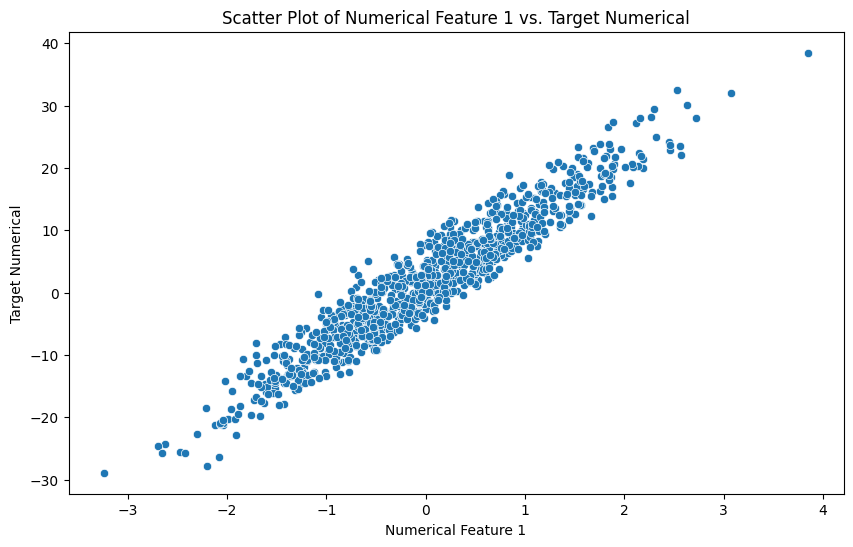

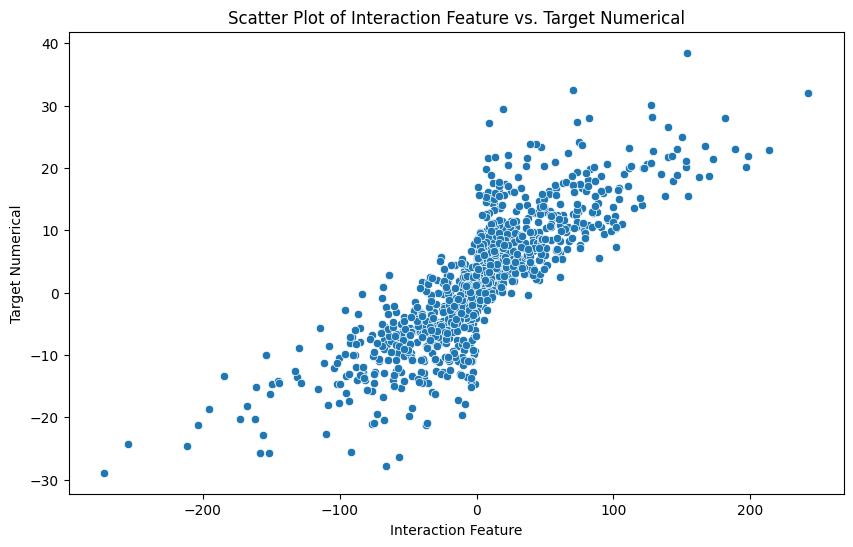

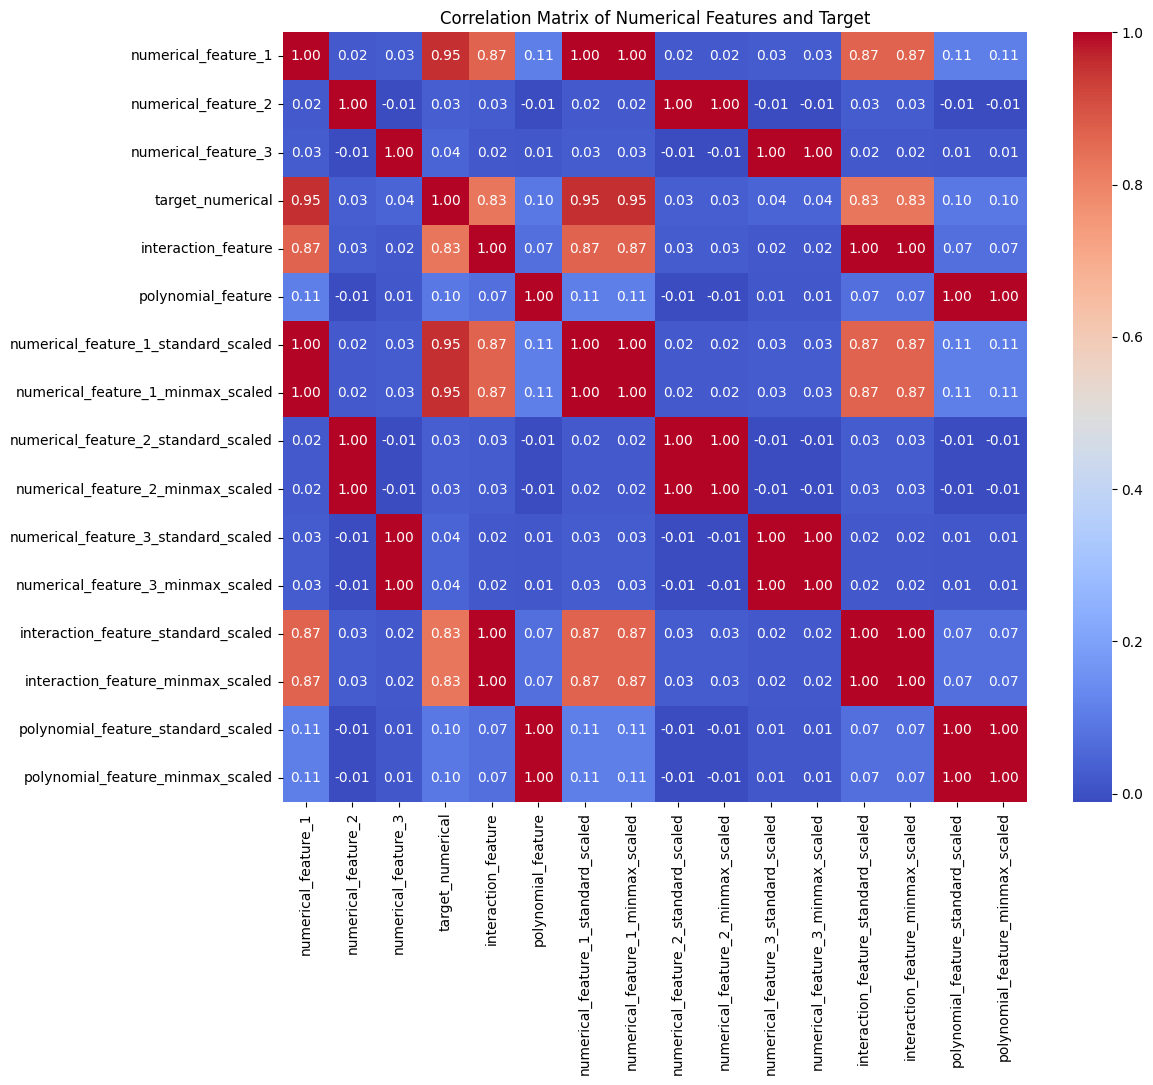

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of 'numerical_feature_1' vs. 'target_numerical'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numerical_feature_1', y='target_numerical', data=df)
plt.title('Scatter Plot of Numerical Feature 1 vs. Target Numerical')
plt.xlabel('Numerical Feature 1')
plt.ylabel('Target Numerical')
plt.show()

# 2. Scatter plot of 'interaction_feature' vs. 'target_numerical'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='interaction_feature', y='target_numerical', data=df)
plt.title('Scatter Plot of Interaction Feature vs. Target Numerical')
plt.xlabel('Interaction Feature')
plt.ylabel('Target Numerical')
plt.show()

# 3. Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Target')
plt.show()

**Reasoning**:
Create a bar plot to visualize the coefficients from the LassoCV model to show the impact of each feature on the target variable.



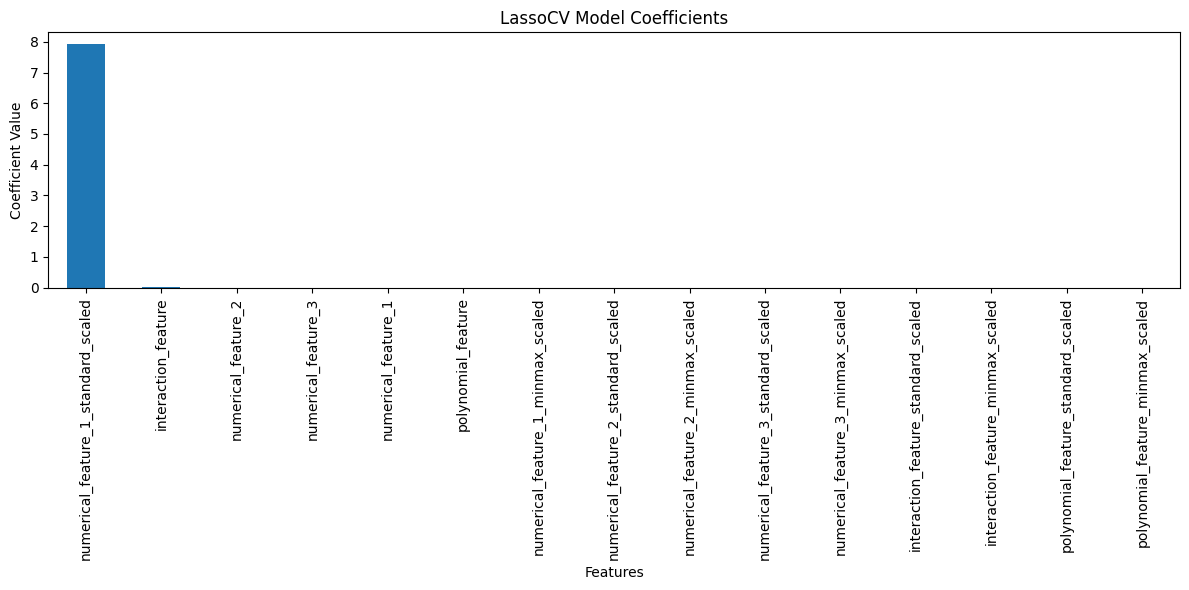

In [8]:
# 4. Bar plot of the coefficients from the LassoCV model
plt.figure(figsize=(12, 6))
coefficients.sort_values(ascending=False).plot(kind='bar')
plt.title('LassoCV Model Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset was successfully generated with 1000 rows and 7 columns, including numerical and categorical features, and two target variables.
*   Three new features were successfully engineered: an interaction feature, a polynomial feature, and a new categorical feature derived from an existing numerical feature.
*   Numerical features were successfully scaled using both StandardScaler and MinMaxScaler, with the results stored in new columns.
*   Using a filtering method (correlation), features with an absolute correlation greater than 0.5 with 'target\_numerical' were identified as 'numerical\_feature\_1', 'interaction\_feature', and their scaled versions.
*   Using a wrapper method (RFE), the top 5 features selected were 'numerical\_feature\_1', 'numerical\_feature\_3', 'polynomial\_feature', 'numerical\_feature\_1\_standard\_scaled', and 'numerical\_feature\_1\_minmax\_scaled'.
*   Using an embedded technique (LassoCV), features with non-zero coefficients were identified as 'numerical\_feature\_2', 'interaction\_feature', and 'numerical\_feature\_1\_standard\_scaled'.
*   Visualizations including scatter plots, a correlation heatmap, and a bar plot of LassoCV coefficients were successfully generated, providing visual insights into feature relationships and selection results.

### Insights or Next Steps

*   Different feature selection methods (filtering, wrapper, embedded) resulted in slightly different sets of selected features, highlighting that the choice of method can impact the outcome. The features 'numerical\_feature\_1' and 'interaction\_feature' were consistently identified as important across most methods.
*   The generated visualizations effectively illustrate the relationships between features and the target and the importance of features as determined by the Lasso model. These visualizations are valuable for understanding the data and the impact of feature engineering and selection.
